In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=sns.load_dataset("iris")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [62]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


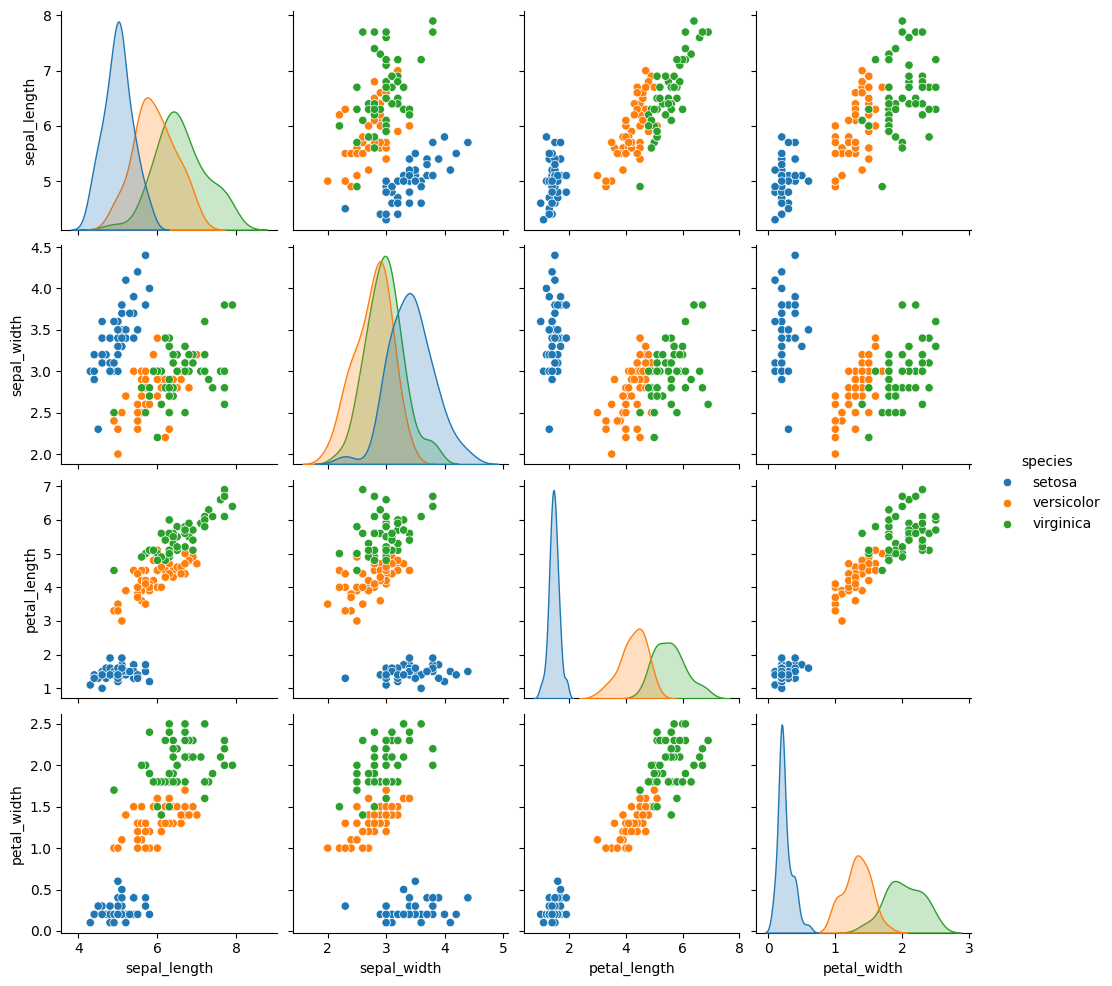

In [100]:
sns.pairplot(data=df,hue="species") 

In [4]:
df.drop_duplicates(inplace=True)

<Axes: >

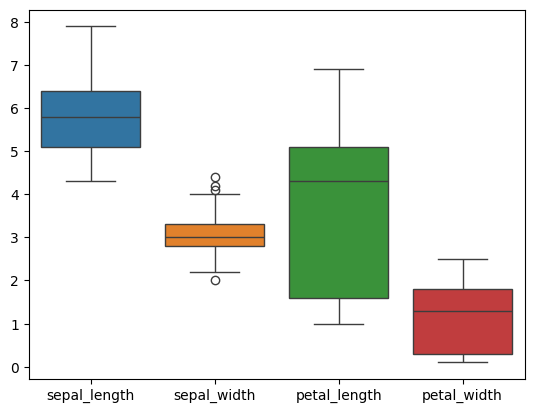

In [ ]:
sns.boxplot(df)

In [5]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df["species"]=encoder.fit_transform(df["species"])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
df["species"].value_counts()

species
0    50
1    50
2    49
Name: count, dtype: int64

In [7]:
x=df.drop(columns=["species"])
y=df["species"]

In [8]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42,shuffle=True,stratify=y)

In [9]:
xtrain.shape,xtest.shape

((119, 4), (30, 4))

In [10]:
from sklearn.preprocessing import StandardScaler
s=StandardScaler()
xtrain=s.fit_transform(xtrain)
xtest=s.transform(xtest)

In [12]:
from sklearn.metrics import accuracy_score

In [ ]:
from sklearn.tree import DecisionTreeClassifier,plot_tree

model=DecisionTreeClassifier()
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)
accuracy_score(ypred,ytest)


0.9666666666666667

In [ ]:
co=x.columns

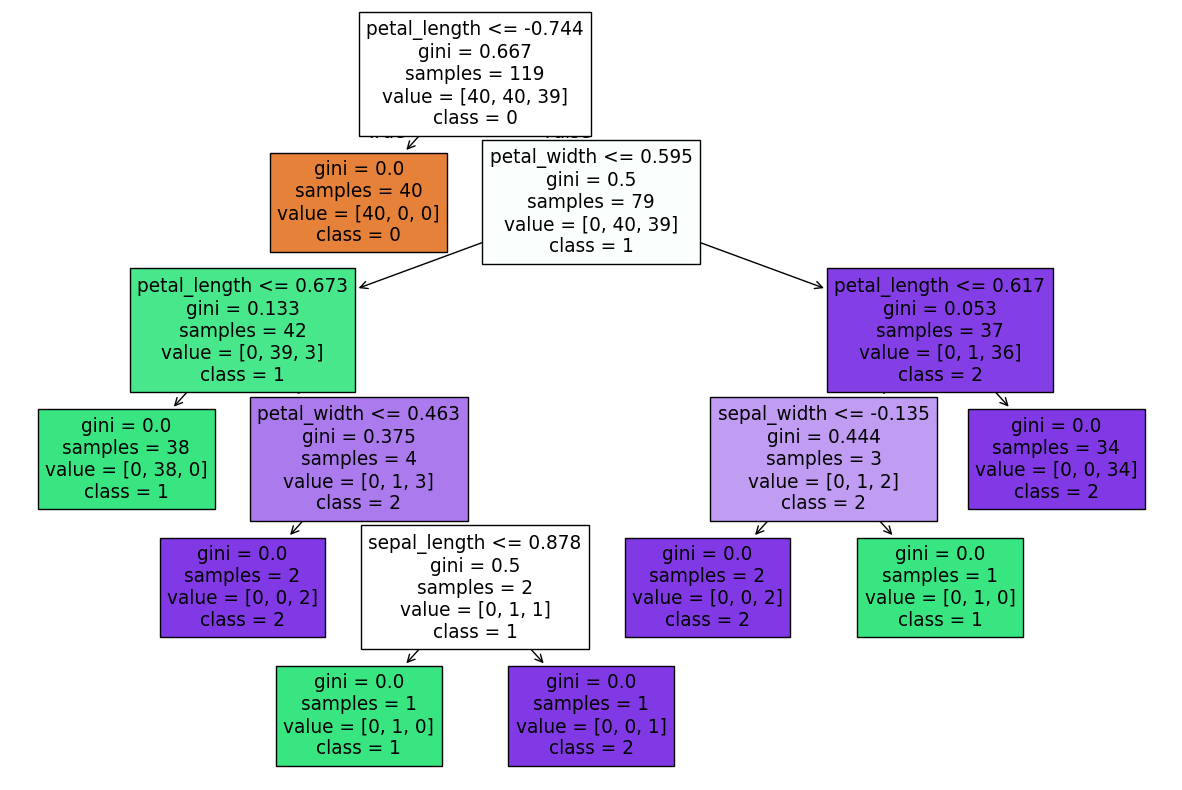

In [ ]:
plt.figure(figsize=(15,10))
plot_tree(model,feature_names=co,class_names=["0","1","2"],filled=True)
plt.show()

In [ ]:
#pre pruning
model=DecisionTreeClassifier(max_depth=3,max_leaf_nodes=4,min_samples_leaf=4,min_samples_split=5)
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)
accuracy_score(ypred,ytest)

0.9666666666666667

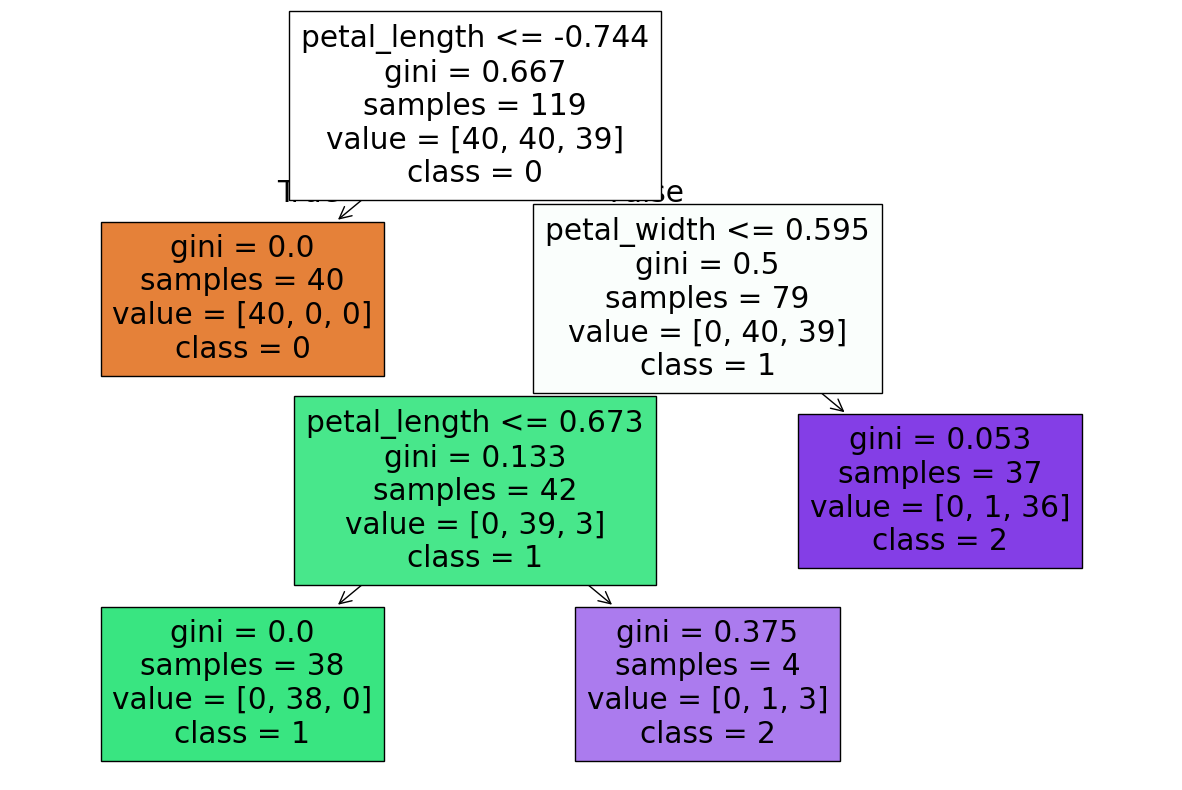

In [ ]:
plt.figure(figsize=(15,10))
plot_tree(model,feature_names=co,class_names=["0","1","2"],filled=True)
plt.show()

In [ ]:
#post Pruning
model=DecisionTreeClassifier()
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)
accuracy_score(ypred,ytest)

0.9666666666666667

In [ ]:
model.cost_complexity_pruning_path(xtrain,ytrain)["ccp_alphas"]

array([0.        , 0.00630252, 0.00817624, 0.03421369, 0.26870837,
       0.33474   ])

In [ ]:
model=DecisionTreeClassifier(ccp_alpha=0.03421369)
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)
accuracy_score(ypred,ytest)

0.9333333333333333

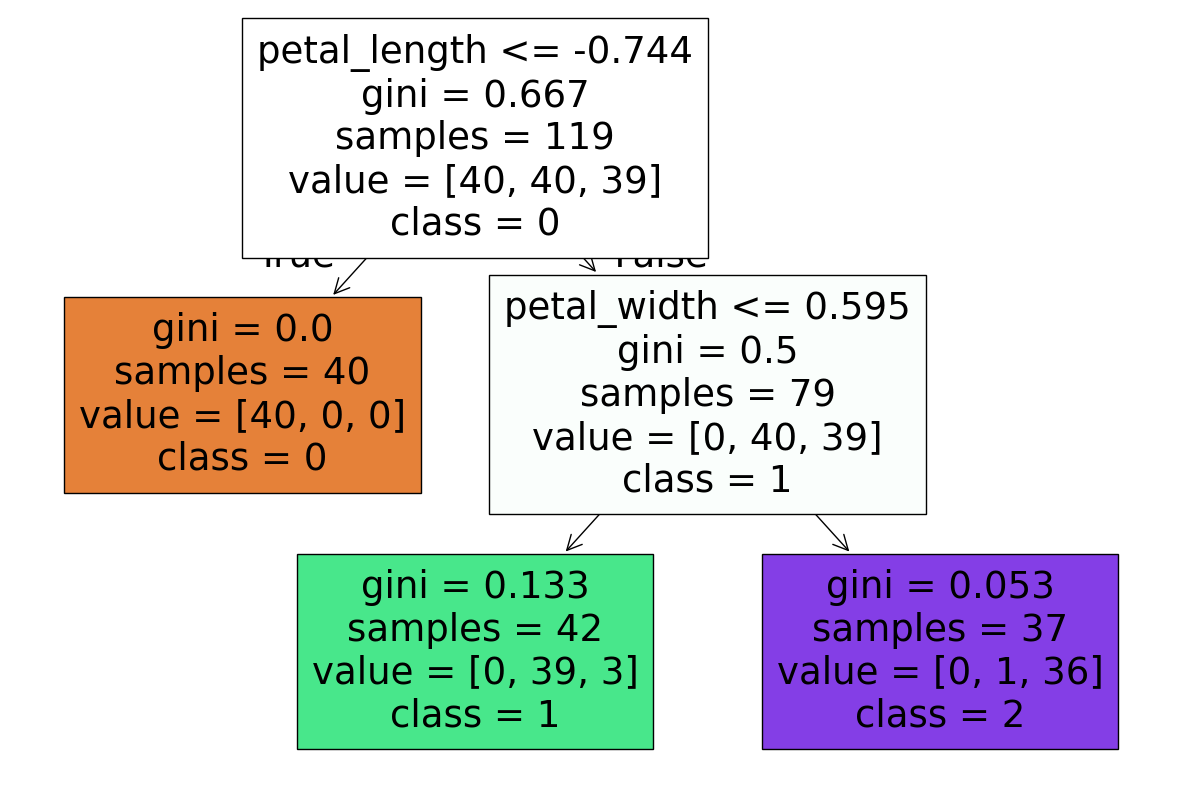

In [ ]:
plt.figure(figsize=(15,10))
plot_tree(model,feature_names=co,class_names=["0","1","2"],filled=True)
plt.show()

In [64]:
from sklearn.model_selection import KFold, cross_val_score

In [66]:
cv=KFold(n_splits=5)
model=DecisionTreeClassifier()
cf=cross_val_score(model,xtrain,ytrain,cv=cv,scoring="f1_macro")

In [67]:
cf

array([0.91666667, 0.94871795, 0.92207792, 1.        , 1.        ])

In [68]:
model

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [ ]:
#adaboost

In [1]:
from sklearn.ensemble import AdaBoostClassifier

In [13]:
ada=AdaBoostClassifier()
ada.fit(xtrain,ytrain)
ypred=ada.predict(xtest)
accuracy_score(ypred,ytest)

0.9333333333333333

In [ ]:
#regression

In [92]:
from sklearn.datasets import fetch_california_housing

In [93]:
data=fetch_california_housing(as_frame=True)

In [94]:
x=data.data
y=data.target

In [73]:
x.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [74]:
y

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MedHouseVal, Length: 20640, dtype: float64

In [75]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


In [76]:
x.duplicated().sum()

np.int64(0)

<Axes: >

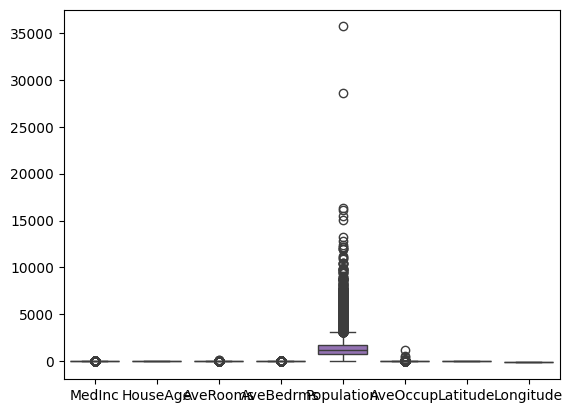

In [77]:
sns.boxplot(x)

In [78]:
x.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')

C:\Users\user\AppData\Local\Temp\ipykernel_4844\3505750071.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x["Population"]=np.log1p(x["Population"])


<Axes: >

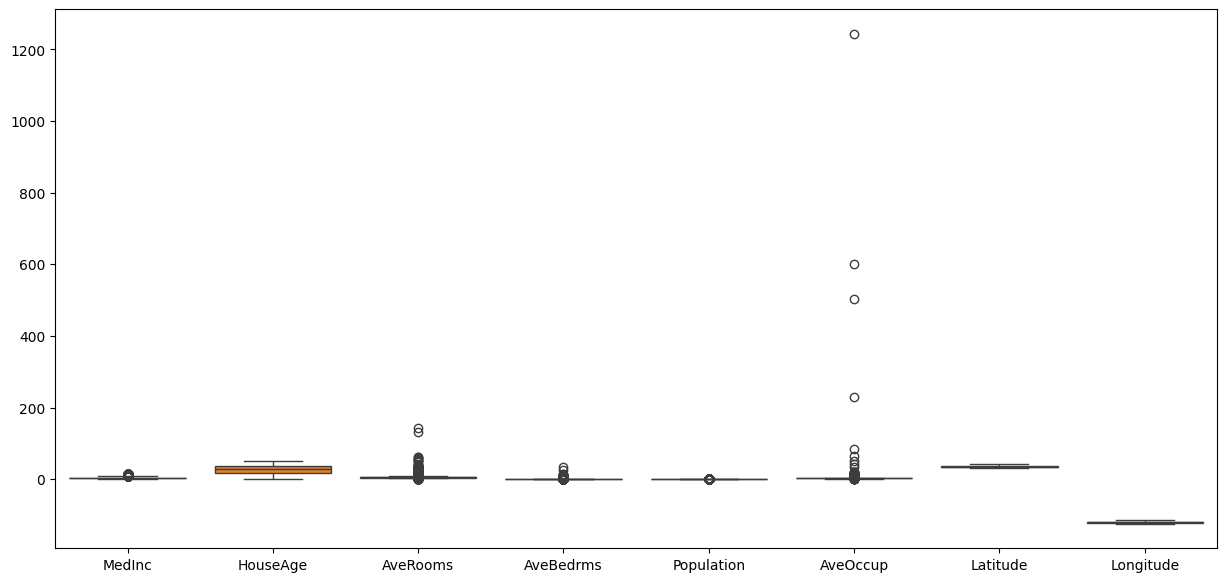

In [81]:
x["Population"]=np.log1p(x["Population"])
plt.figure(figsize=(15,7))
sns.boxplot(x)

In [95]:
x["AveRooms"]=np.log1p(x["AveRooms"])
x["AveOccup"]=np.log1p(x["AveOccup"])
x["AveBedrms"]=np.log1p(x["AveBedrms"])


C:\Users\user\AppData\Local\Temp\ipykernel_4844\114535778.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x["AveRooms"]=np.log1p(x["AveRooms"])
C:\Users\user\AppData\Local\Temp\ipykernel_4844\114535778.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x["AveOccup"]=np.log1p(x["AveOccup"])
C:\Users\user\AppData\Local\Temp\ipykernel_4844\114535778.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

<Axes: >

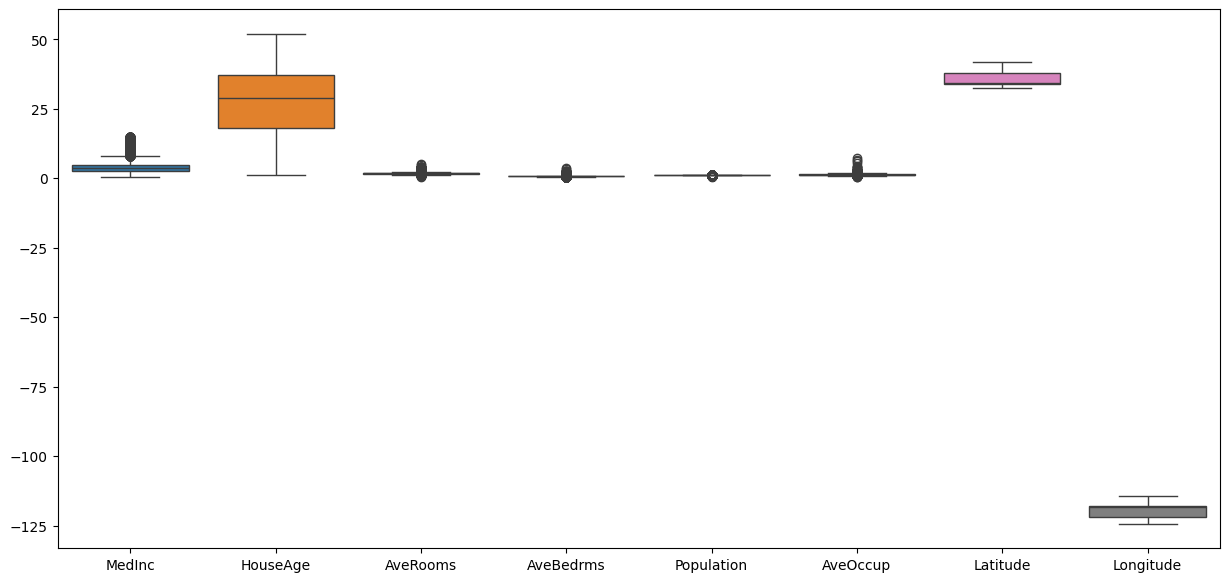

In [83]:
plt.figure(figsize=(15,7))
sns.boxplot(x)

In [96]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)

In [97]:
scaler=StandardScaler()
xtrain=scaler.fit_transform(xtrain)
xtest=scaler.transform(xtest)

In [86]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [87]:
from sklearn.metrics import mean_absolute_error

In [88]:
dt=DecisionTreeRegressor()
dt.fit(xtrain,ytrain)
ypred=dt.predict(xtest)
mean_absolute_error(ypred,ytest)

0.45186691375968996

In [89]:
rf=RandomForestRegressor()
rf.fit(xtrain,ytrain)
ypred=rf.predict(xtest)
mean_absolute_error(ypred,ytest)

0.3259877325581397

In [107]:
#xgb
import xgboost as xgb

In [108]:
xg=xgb.XGBClassifier(learning_rate=0.1,gamma=20)
xg.fit(xtrain,ytrain)
ypred=xg.predict(xtest)
accuracy_score(ypred,ytest)

0.9333333333333333

In [109]:
xg

,objective,'multi:softprob'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None
